# **Analyzing the Impact of Castle Doctrine Laws on Violent Crime Rates in the USA**

![fbi.jpg](fbi.jpg)
## **Introduction**

The **Castle Doctrine** is a legal principle that grants individuals the right to use reasonable force, including deadly force, to defend themselves against an intruder within their own homes. Rooted in the notion that one's home is their "castle," these laws eliminate the duty to retreat before using force in self-defense. Proponents argue that the Castle Doctrine empowers lawful homeowners to protect themselves and deters criminal activity, while critics express concerns that such laws may escalate violence and lead to an increase in homicides.

Understanding the **causal relationship** between the implementation of Castle Doctrine laws and changes in violent crime rates is crucial for policymakers, law enforcement agencies, and communities. By analyzing this relationship, we can assess whether these laws effectively reduce crime or inadvertently contribute to higher rates of violence.

## **Dataset Overview**

This analysis utilizes a comprehensive dataset from the **FBI**, encompassing various states over multiple years. The dataset captures a wide range of variables related to violent crimes, socioeconomic conditions, and demographic factors. Notably, the implementation of Castle Doctrine laws occurred at different times across states, with the majority adopting these statutes around **2006**. This staggered adoption provides a unique opportunity to employ robust methodologies to isolate the effect of these laws on violent crime rates.

### **Selected Columns for Analysis**

For a focused and meaningful analysis, we restrict our examination to the following columns from the dataset:

| **Column**         | **Description**                                                                                                                                                                                                                 |
|--------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `year`             | The calendar year of the observation (e.g., 2005, 2010).                                                                                                                                                                       |
| `post`             | A binary indicator where `1` signifies the post-treatment period (after the implementation of Castle Doctrine laws) and `0` denotes the pre-treatment period.                                                                    |
| `sid`              | The state identifier, uniquely representing each state in the dataset.                                                                                                                                                       |
| `homicide`         | The number of homicides recorded in the state per 100,000 population for the given year.                                                                                                                                       |
| `robbery`          | The number of robberies reported in the state per 100,000 population for the given year.                                                                                                                                        |
| `larceny`          | The number of larcenies recorded in the state per 100,000 population for the given year.                                                                                                                                        |
| `assault`          | The number of aggravated assaults reported in the state per 100,000 population for the given year.                                                                                                                              |
| `burglary`         | The number of burglaries recorded in the state per 100,000 population for the given year.
| `l_exp_pubwelfare`         | Logged public welfare spending                                                                                                                                        |
| `l_police`         | Logged police presence                                                                                                                                        |
| `l_income`         | Logged income                                                                                                                                        |

| `murder`           | The number of murders reported in the state per 100,000 population for the given year.                                                                                                                                          |
| `unemployrt`       | The unemployment rate in the state for the given year, serving as an economic indicator.                                                                                                                                          |
| `poverty`          | The poverty rate in the state for the given year, reflecting socioeconomic conditions.                                                                                                                                           |
| `blackm_15_24`     | The percentage of Black males aged 15-24 in the state for the given year.                                                                                                                                                        |
| `whitem_15_24`     | The percentage of White males aged 15-24 in the state for the given year.                                                                                                                                                        |
| `popwt`     | Population weight                                                                                                                                                                                                                       |

### **Crime Definitions**

To ensure clarity in our analysis, it's essential to define each of the key crime-related variables included in our dataset:

| **Variable**   | **Definition**                                                                                                                                                                                                                     |
|----------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Homicide**   | **Homicide** is defined as the sum of **murder** and **non-negligent manslaughter**. It represents the total number of intentional killings within a state, normalized per 100,000 state population.                                 |
| **Murder**     | **Murder** refers to the unlawful killing of another human being without justification or valid excuse, committed with the necessary intention as defined by the law in a specific jurisdiction.                                           |
| **Larceny**    | **Larceny** is the unlawful taking and carrying away of personal property with the intent to deprive the rightful owner of it permanently. It encompasses various forms of theft that do not involve force or intimidation.               |
| **Assault**    | **Assault** involves the act of causing physical harm or unwanted physical contact to another person. This includes aggravated assaults, which are more severe and may involve the use of weapons or intent to cause serious injury.       |
| **Burglary**   | **Burglary** is the act of illegally entering a building or other areas without permission, typically with the intention of committing a further criminal offense inside. It does not necessarily involve theft or violence.            |
| **Robbery**    | **Robbery** is the act of taking property or money from a person through force, intimidation, or threat of violence. Unlike larceny, robbery involves direct confrontation and coercion against the victim.                                |


### **Temporal and Spatial Dimensions**

The dataset spans multiple states across the United States and covers several years, allowing for a longitudinal analysis of crime trends in relation to the implementation of Castle Doctrine laws. Most states adopted these statutes around **2006**, but the exact year of implementation varies, providing a natural experiment setting to evaluate the laws' impact. By comparing states before and after the adoption period and against states that did not adopt the law during the study period, we can effectively employ different techniques to infer causality.

---



In [ ]:
#import as needed
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

## Dataset Exploration

In [ ]:
# Import dataset
df = pd.read_csv("castle_doctrine_fbi.csv")


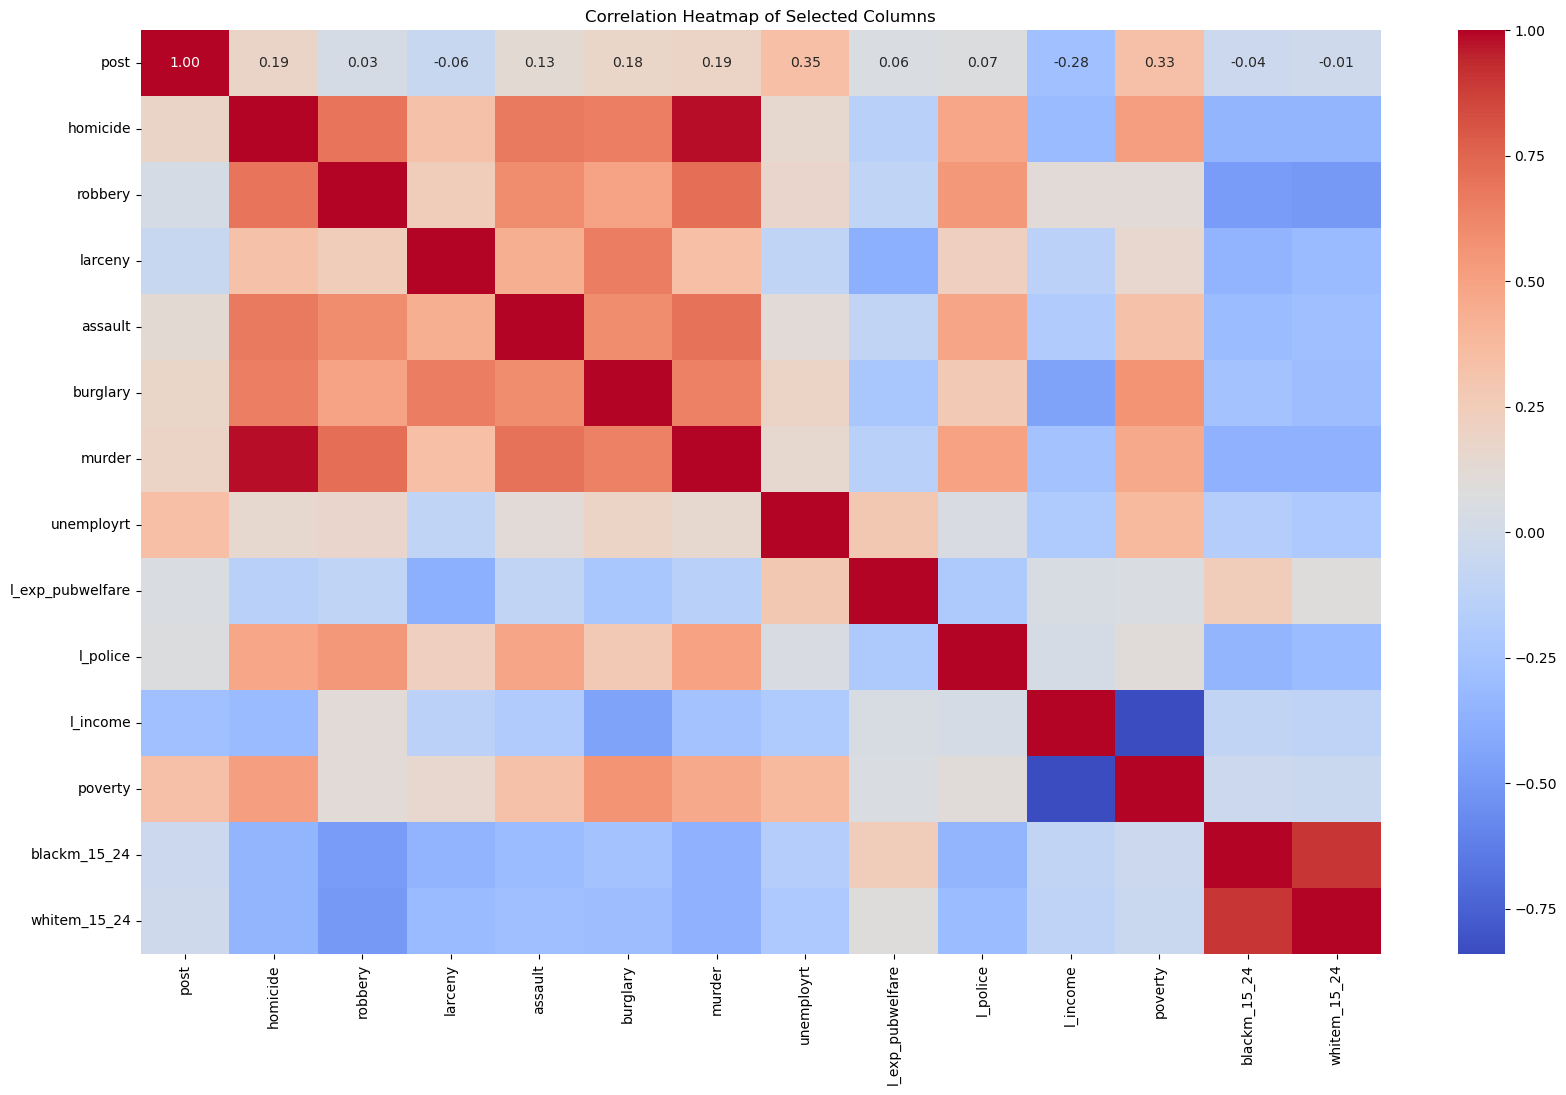

In [ ]:
selected_columns = ['post', 'homicide', 'robbery', 'larceny',
                    'assault', 'burglary', 'murder', 'unemployrt','l_exp_pubwelfare' ,'l_police','l_income',
                    'poverty', 'blackm_15_24', 'whitem_15_24']

#Plot correlation heatmap
df_selected = df[selected_columns]
corr = df_selected.corr()
plt.figure(figsize=(20, 12))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Selected Columns')
plt.show()

1. Corelation No.1: "poverty" vs "unemployrt"
    - This is a pretty intuitive and unsuprising corelation as those are unemployed would tend to have lower financial status.
    - The two are likely directly causally related as unemployment does often directly lead to poverty
    - There could however be a confounding variable like "l_exp_pubwelfare" which describes the spending on public welfare and that could also have an effect on the poverty status of an individual as well.
2. Correlation No.2: "l_exp_pubwelfare" vs "poverty"
    - There is a moderate corelation l_exp_pubwelfare and poverty. This can be interpretated as such because higher public welfare expenditures might be associated with areas of high poverty because public welfare programs target such regions.
    - This is a indirect casual analysis as confounder variables like other policy decisions and economic conditions might also play a role however we should still note that the level of poverty still likely drives welfare expenditure.
3. Corelation No.3: "l_police" vs "homicide":
    - There is present, a slight positive contribution between l_police and homicide.
    - It is very likely that this is not implying that higher police presence is causing higher homicides in such areas but instead due to higher police expenditure towards regions with higher homicide rates, this makes them allocate more resources to law enforcement and having a higher logged presence specifically in that region.
    - This is likely a an indirect relationship, higher homicide rates result in higher police presence and not the opposite. Many any other confounder variables like poverty rates, unemployment rates and just general economic factors such as the public welfare spent can all high a more significant effect on the homicide rates.
4. Corelation No.4: 'poverty' vs 'burglary':
    - There is quite a high positive corellation between our robbbery and poverty stats.
    - Interpreating this corellation, one could come to a possible conclusion that lower poverty rates does result in people in great financial despair thus being unable to fullfil their financial needs. Such people resorting resorting to burglary would then make perfect realistic sense.
    - This is a causal relationship however it may be indirect as confounding variables like the police presence in the area or the unemployment of the person (which would affect their poverty level)
5. Corelation No.5: 'poverty' vs 'l_income'
    - This is a very obvious completely negative corelation.
    - It doesn't deserve much explanation as any person who logs their income as higher will obviously have a lower poverty level thus this inverse relationship is shown clearly.
    - While the relationship may be obvious/redundant, I still felt that it was important to show just get an idea of the spectrum and the procedure in which we analyze such heatmaps.
    - Finally, this is almost definetely direct causal relationship and there should be no confounding variables unless they are forcefully introduced for some other purposes.

## **Analyzing the Impact of Castle Doctrine Laws on Homicide Rates**

We set out to analyze the impact of Castle Doctrine laws on homicide rates across different states in the United States. This investigation is particularly intriguing as it delves into the delicate balance between individual self-defense rights and broader public safety concerns. By examining whether the implementation of these laws correlates with changes in homicide rates, we aim to uncover insights that could inform policymakers and the community. However, we remain cautious, fully aware of the complexities involved in isolating the law's effect amidst a myriad of confounding factors. Despite these challenges, our analysis strives to navigate these intricacies to shed light on the implications of Castle Doctrine legislation.

In [ ]:
bef_avg_hom = df[df['post'] == 0 ]["homicide"].mean()
aft_avg_hom = df[df['post'] == 1]["homicide"].mean()

ATE = aft_avg_hom - bef_avg_hom
print(ATE)

1.3488435295735863



Calculate the p-value for the treatment and store it in `p_value`.

Comment on the statistical significance of your result. What does this p-value say about homicide rates and the impact of the castle doctrine based on our assumptions? Clearly state your null and alternative hypotheses. Should you reject the null hypothesis?


In [ ]:
import pandas as pd
from scipy.stats import ttest_ind


# Filter and sort by year to get the latest 50 instances for both groups
pre_doctrine = df[df['post'] == 0].sort_values(by='year', ascending=False).head(50)['homicide']
post_doctrine = df[df['post'] == 1].sort_values(by='year', ascending=False).head(50)['homicide']

# Perform independent t-test assuming unequal variances
t_stat, p_value = ttest_ind(pre_doctrine,post_doctrine, equal_var=False)
p_value

# b) As the p-value is less than 0.05, we reject the null hypothesis, indicating that there is a statistically significant difference in homicide rates before and after the doctrine was implemented.

6.6291983943435336e-06

Calculate the ATE across every state separately.

Report the CATE. Store it in the `CATE` variable.

Evidence for the **Simpson's Paradox** for any individual state?

In [ ]:
states_with_doctrine = df[df['post'] == 1]['sid'].unique()
df_filtered = df[df['sid'].isin(states_with_doctrine)]

sids = []
pre_treatment_avg_homicide = []
post_treatment_avg_homicide = []
ate_homicide = []

for sid, group in df_filtered.groupby('sid'):
    pre_avg = group[group['post'] == 0]['homicide'].mean()
    post_avg = group[group['post'] == 1]['homicide'].mean()
    ate = post_avg - pre_avg

    sids.append(sid)
    pre_treatment_avg_homicide.append(pre_avg)
    post_treatment_avg_homicide.append(post_avg)
    ate_homicide.append(ate)

DF_CATE_STATE = pd.DataFrame({
    'sid': sids,
    'Pre_Treatment_Avg_Homicide': pre_treatment_avg_homicide,
    'Post_Treatment_Avg_Homicide': post_treatment_avg_homicide,
    'ATE_Homicide': ate_homicide
})

DF_CATE_STATE = DF_CATE_STATE.sort_values(by='sid')

CATE = DF_CATE_STATE['ATE_Homicide'].mean()

print(DF_CATE_STATE)
print("CATE:", CATE)

DF_CATE_STATE
CATE

    sid  Pre_Treatment_Avg_Homicide  Post_Treatment_Avg_Homicide  ATE_Homicide
0     1                    7.461809                     7.239657     -0.222152
1     2                    5.490787                     4.528263     -0.962524
2     3                    7.665295                     7.133347     -0.531949
3    10                    5.506912                     6.041792      0.534881
4    11                    7.240239                     6.608315     -0.631924
5    15                    5.911693                     5.035126     -0.876567
6    17                    4.383397                     4.012131     -0.371267
7    18                    4.794723                     4.652908     -0.141815
8    19                   12.569534                    12.583059      0.013525
9    23                    6.716056                     6.002740     -0.713317
10   25                    8.888911                     7.176285     -1.712626
11   26                    6.315173                 

-0.20842067520786078

1. State-Level ATEs: In the dataframe, most ATE_Homicide values are negative, suggesting a decrease in the homicide rate after treatment. For example:- State 2 has an ATE_Homicide of -0.962524.
            - State 11 has an ATE_Homicide of -0.631924.
2. Combined ATE: The overall CATE (mean of ATE_Homicide across all states) is -0.20842, showing a general reduction in the homicide rate after treatment.

if you observe that some states with high Pre_Treatment_Avg_Homicide and low treatment effect (ATE_Homicide) disproportionately influence the overall mean, this could lead to Simpson's Paradox such as how State 19 has a high Pre_Treatment_Avg_Homicide (12.569534) but a very low ATE_Homicide (0.013525), which might distort the overall effect when aggregated.

This could occur due to a multitude of reasons:
1. Confounding Factors: Differences in the population or crime prevention methods between states might bias the results.
2. Weighting of Aggregates: States with larger Pre_Treatment_Avg_Homicide might have more influence on the overall trend, even if their ATE_Homicide is small.
3. Heterogeneity: The treatment may not be equally effective across all states due to local conditions or policies.



Find the ATE for those states in 2010 (i.e. post treatment group) and 2005 (i.e. pre treatment group),`

Report the CATE. Store it in the variable `CATE_Y`


In [ ]:
# Filter the dataset to include only the states that implemented the doctrine in 2010
states_with_doctrine_2010 = df[(df['post'] == 1) & (df['year'] == 2010)]['sid'].unique()
df_filtered = df[df['sid'].isin(states_with_doctrine_2010)]

# Restrict the analysis to the year 2005 for pre-implementation and 2010 for post-implementation
df_pre_2005 = df_filtered[df_filtered['year'] == 2005]
df_post_2010 = df_filtered[df_filtered['year'] == 2010]

# Initialize lists to store the results
sids = []
pre_treatment_avg_homicide = []
post_treatment_avg_homicide = []
ate_homicide = []

# Group the data by state and calculate the required values
for sid in states_with_doctrine_2010:
    pre_avg = df_pre_2005[df_pre_2005['sid'] == sid]['homicide'].mean()
    post_avg = df_post_2010[df_post_2010['sid'] == sid]['homicide'].mean()
    ate = post_avg - pre_avg

    sids.append(sid)
    pre_treatment_avg_homicide.append(pre_avg)
    post_treatment_avg_homicide.append(post_avg)
    ate_homicide.append(ate)

# Create the DataFrame
DF_CATE_STATE_YEAR = pd.DataFrame({
    'sid': sids,
    'Pre_Treatment_Avg_Homicide': pre_treatment_avg_homicide,
    'Post_Treatment_Avg_Homicide': post_treatment_avg_homicide,
    'ATE_Homicide': ate_homicide
})

# Sort the DataFrame by 'sid'
DF_CATE_STATE_YEAR = DF_CATE_STATE_YEAR.sort_values(by='sid')

# Calculate the Conditional Average Treatment Effect (CATE)
CATE_Y = DF_CATE_STATE_YEAR['ATE_Homicide'].mean()

# Print the DataFrame and CATE
print(DF_CATE_STATE_YEAR)
print("CATE_Y:", CATE_Y)

# Store the results in the required variables
DF_CATE_STATE_YEAR
CATE_Y

    sid  Pre_Treatment_Avg_Homicide  Post_Treatment_Avg_Homicide  ATE_Homicide
0     1                    8.418573                     5.742760     -2.675813
1     2                    4.986567                     4.427856     -0.558711
2     3                    7.633144                     6.445258     -1.187886
3    10                    5.079818                     5.285303      0.205485
4    11                    6.393730                     5.804785     -0.588945
5    15                    5.842414                     4.521347     -1.321067
6    17                    3.793262                     3.529431     -0.263831
7    18                    4.681379                     4.330973     -0.350407
8    19                   10.251161                    11.357343      1.106182
9    23                    6.375700                     5.722250     -0.653450
10   25                    7.577485                     7.029704     -0.547781
11   26                    7.137898                 

-0.6419749809523808

The analysis provides valuable insights into the potential impact of the Castle Doctrine on homicide rates, it The analysis provided calculates the Conditional Average Treatment Effect (CATE) by comparing the average homicide rates before and after the implementation of the Castle Doctrine in 2010 for states that implemented the doctrine.It still may not however fully capture the true causal effect due to several potential limitations and assumptions such as:
- There being no other unmeasured Confounders
- There being no selection bias
- Each state has a non-zero probability of implementing or not implementing the Castle Doctrine thus f some states are highly unlikely to implement the doctrine, the generalisability of the results might be limited.
- Consistency as the treatment effect may not be consistent for all states and the affect of the Castle Doctrine might vary across states due to differences in implementation or other contextual factors.




One of the fundamental Quasi-Experimental methods of measuring the ATE is the difference in difference approach. It allows us to effectively control for both:

1. **Time-Invariant Differences:** Any unobserved characteristics that do not change over time, such as cultural factors or baseline law enforcement practices.
2. **Common Temporal Trends:** Broader trends affecting all states, like economic shifts or national policy changes.


  Mathematically, the **Difference-in-Differences** estimator is expressed as:

  $DiD = (\overline{Y}_{\text{Post, Treated}} - \overline{Y}_{\text{Pre, Treated}}) - (\overline{Y}_{\text{Post, Control}} - \overline{Y}_{\text{Pre, Control}})$.


**a)** Plot an **overlaid line plot** of how the **mean of homicide rate** changes across time for states after and before implementing the doctrine. For reference to how your plot should look like, consult **plot.jpg** in your assignment folder.



**b)**  Report the ATE estimated using the DiD formula where:

-   Assume the pre-intervention period is 2005, while the post-intervention period is 2010,
-   Given **S** defines your set of all states, your treatment group **T** consists of the states that have implemented the doctrine in **2010**, and your control group are the states **S\T** in **2005** (i.e. the states apart from those incorporated in T)
-   Store your result in the `DiD_homicide` variable

**c)** Comment on the value of ATE obtained through DiD and the approach we used in the previous part. Which one do you believe is more robust to observing an association between homicide rates and the introdution of the Castle Doctrine?

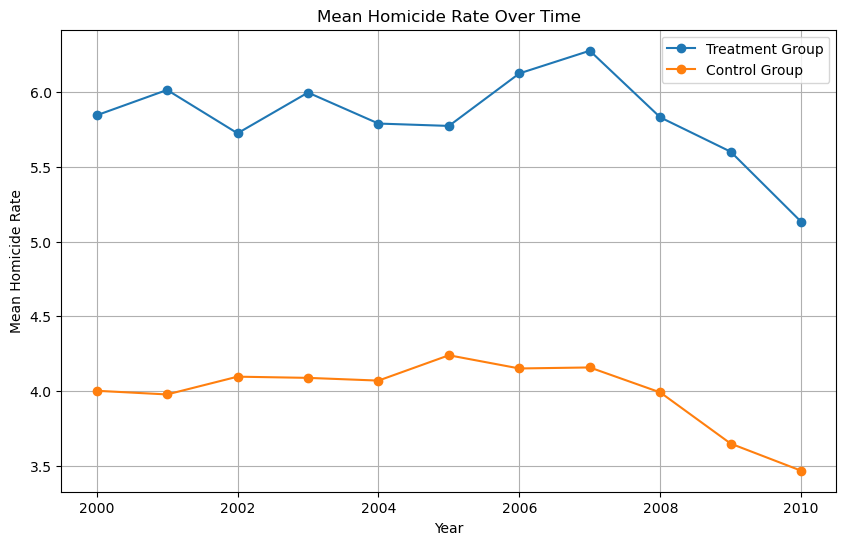

DiD_homicide: 0.13131605353037656


0.13131605353037656

In [ ]:
# Define the treatment group (states that implemented the doctrine in 2010)
treatment_states = df[(df['post'] == 1) & (df['year'] == 2010)]['sid'].unique()

# Define the control group (states that did not implement the doctrine in 2010)
control_states = df[~df['sid'].isin(treatment_states)]['sid'].unique()

# Calculate the mean homicide rate for each year for both groups
mean_homicide_treatment = df[df['sid'].isin(treatment_states)].groupby('year')['homicide'].mean()
mean_homicide_control = df[df['sid'].isin(control_states)].groupby('year')['homicide'].mean()

# Plot the mean homicide rates over time for both groups
plt.figure(figsize=(10, 6))
plt.plot(mean_homicide_treatment.index, mean_homicide_treatment.values, label='Treatment Group', marker='o')
plt.plot(mean_homicide_control.index, mean_homicide_control.values, label='Control Group', marker='o')
plt.xlabel('Year')
plt.ylabel('Mean Homicide Rate')
plt.title('Mean Homicide Rate Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Calculate the ATE using the DiD formula
pre_treatment_2005 = df[(df['year'] == 2005)]
post_treatment_2010 = df[(df['year'] == 2010)]

mean_pre_treatment_treatment = pre_treatment_2005[pre_treatment_2005['sid'].isin(treatment_states)]['homicide'].mean()
mean_post_treatment_treatment = post_treatment_2010[post_treatment_2010['sid'].isin(treatment_states)]['homicide'].mean()

mean_pre_treatment_control = pre_treatment_2005[pre_treatment_2005['sid'].isin(control_states)]['homicide'].mean()
mean_post_treatment_control = post_treatment_2010[post_treatment_2010['sid'].isin(control_states)]['homicide'].mean()

DiD_homicide = (mean_post_treatment_treatment - mean_pre_treatment_treatment) - (mean_post_treatment_control - mean_pre_treatment_control)

# Print the DiD result
print("DiD_homicide:", DiD_homicide)

# Store the result in the required variable
DiD_homicide

The DiD approach is more robust than the simple pre-post comparison because it controls for both time-invariant differences and common temporal trends. This helps provide a more accurate estimate of the causal effect of the doctrine on homicide rates.


Lets Calculate the **Difference-in-Differences (DiD)** estimates for the following crime categories:

- **Murder**
- **Robbery**
- **Larceny**
- **Assault**

Using the same DiD formula as previously defined, perform the calculations for each of these crime types to assess whether the implementation of Castle Doctrine laws is associated with a significant change in their respective rates.

a) **Report the DiD Estimates:**

b) **Interpret the Results:**


In [ ]:

# Define the treatment group (states that implemented the doctrine in 2010)
treatment_states = df[(df['post'] == 1) & (df['year'] == 2010)]['sid'].unique()

# Define the control group (states that did not implement the doctrine in 2010)
control_states = df[~df['sid'].isin(treatment_states)]['sid'].unique()

# Calculate the DiD estimates for each crime category

# Murder
pre_treatment_2005 = df[(df['year'] == 2005)]
post_treatment_2010 = df[(df['year'] == 2010)]

mean_pre_treatment_treatment_murder = pre_treatment_2005[pre_treatment_2005['sid'].isin(treatment_states)]['murder'].mean()
mean_post_treatment_treatment_murder = post_treatment_2010[post_treatment_2010['sid'].isin(treatment_states)]['murder'].mean()

mean_pre_treatment_control_murder = pre_treatment_2005[pre_treatment_2005['sid'].isin(control_states)]['murder'].mean()
mean_post_treatment_control_murder = post_treatment_2010[post_treatment_2010['sid'].isin(control_states)]['murder'].mean()

DiD_murder = (mean_post_treatment_treatment_murder - mean_pre_treatment_treatment_murder) - (mean_post_treatment_control_murder - mean_pre_treatment_control_murder)

# Robbery
mean_pre_treatment_treatment_robbery = pre_treatment_2005[pre_treatment_2005['sid'].isin(treatment_states)]['robbery'].mean()
mean_post_treatment_treatment_robbery = post_treatment_2010[post_treatment_2010['sid'].isin(treatment_states)]['robbery'].mean()

mean_pre_treatment_control_robbery = pre_treatment_2005[pre_treatment_2005['sid'].isin(control_states)]['robbery'].mean()
mean_post_treatment_control_robbery = post_treatment_2010[post_treatment_2010['sid'].isin(control_states)]['robbery'].mean()

DiD_robbery = (mean_post_treatment_treatment_robbery - mean_pre_treatment_treatment_robbery) - (mean_post_treatment_control_robbery - mean_pre_treatment_control_robbery)

# Larceny
mean_pre_treatment_treatment_larceny = pre_treatment_2005[pre_treatment_2005['sid'].isin(treatment_states)]['larceny'].mean()
mean_post_treatment_treatment_larceny = post_treatment_2010[post_treatment_2010['sid'].isin(treatment_states)]['larceny'].mean()

mean_pre_treatment_control_larceny = pre_treatment_2005[pre_treatment_2005['sid'].isin(control_states)]['larceny'].mean()
mean_post_treatment_control_larceny = post_treatment_2010[post_treatment_2010['sid'].isin(control_states)]['larceny'].mean()

DiD_larceny = (mean_post_treatment_treatment_larceny - mean_pre_treatment_treatment_larceny) - (mean_post_treatment_control_larceny - mean_pre_treatment_control_larceny)

# Assault
mean_pre_treatment_treatment_assault = pre_treatment_2005[pre_treatment_2005['sid'].isin(treatment_states)]['assault'].mean()
mean_post_treatment_treatment_assault = post_treatment_2010[post_treatment_2010['sid'].isin(treatment_states)]['assault'].mean()

mean_pre_treatment_control_assault = pre_treatment_2005[pre_treatment_2005['sid'].isin(control_states)]['assault'].mean()
mean_post_treatment_control_assault = post_treatment_2010[post_treatment_2010['sid'].isin(control_states)]['assault'].mean()

DiD_assault = (mean_post_treatment_treatment_assault - mean_pre_treatment_treatment_assault) - (mean_post_treatment_control_assault - mean_pre_treatment_control_assault)

# Print the DiD results
print("DiD_murder:", DiD_murder)
print("DiD_robbery:", DiD_robbery)
print("DiD_larceny:", DiD_larceny)
print("DiD_assault:", DiD_assault)

# Store the results in the required variables
DiD_murder
DiD_robbery
DiD_larceny
DiD_assault

DiD_murder: 0.15640436305418648
DiD_robbery: -2.583372701149443
DiD_larceny: -0.6787267651893671
DiD_assault: -4.630575024630616


-4.630575024630616

DiD estimates that are positive such as for murder indicate the increase in homicide rates in the treatment group (states that implemented the Castle Doctrine) is greater than the increase in the control group (states that did not implement the Castle Doctrine). This suggests that the Castle Doctrine may be associated with an increase in homicide rates.

Secondly, most of the other crimes which had negative DiD Estimates which indicates that the increase in those crime rates in the treatment group is less than the increase in the control group thus suggesting that the Castle Doctrine may be associated with a decrease in crime rates for these crimes.

###  Multivariate Regression

We aim to isolate the effect of the Castle Doctrine law on homicide rates, holding all other factors constant. This approach is more robust than simpler comparisons, as it **controls for multiple potential confounding factors** and focuses on within-state changes over time, not just across states.




In [ ]:
import statsmodels.formula.api as smf

# Our control variables
control_vars = ['unemployrt', 'poverty', 'l_income', 'l_exp_pubwelfare', 'l_police']
controls = ' + '.join(control_vars)

# The OLS model we're using for regression. We use cluster standards error to better adjust for potential within-state correlations.
formula = f'homicide ~ post + {controls} + C(sid) + C(year)'
model = smf.ols(formula=formula, data=df).fit(cov_type='cluster', cov_kwds={'groups': df['sid']})

# Use this summary for your interpretations
display(model.summary())

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 65, but rank is 16
  warnings.warn('covariance of constraints does not have full '


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               homicide   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     265.6
Date:                Sun, 17 Nov 2024   Prob (F-statistic):           6.82e-42
Time:                        22:39:29   Log-Likelihood:                -533.33
No. Observations:                 550   AIC:                             1199.
Df Residuals:                     484   BIC:                             1483.
Df Model:                          65                                         
Covariance Type:              cluster                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -2.7559     13.270     -0.208      0.835     -28.765      23.253
C(sid)[T.2]         -2.8648      0.577     -4.961      0.000      -3.997      -1.733
C(sid)[T.3]         -0.0666      0.191     -0.348      0.728      -0.442       0.309
C(sid)[T.4]         -0.9296      0.197     -4.709      0.000      -1.317      -0.543
C(sid)[T.5]         -1.2519      0.372     -3.364      0.001      -1.981      -0.522
C(sid)[T.6]         -4.1867      0.530     -7.904      0.000      -5.225      -3.149
C(sid)[T.7]         -4.7908      0.597     -8.027      0.000      -5.961      -3.621
C(sid)[T.8]         -3.7973      0.451     -8.428      0.000      -4.680      -2.914
C(sid)[T.10]        -1.8572      0.299     -6.217      0.000      -2.443      -1.272
C(sid)[T.11]        -0.5133      0.208     -2.470      0.014      -0.921      -0.106
C(sid)[T.12]        -5.8375      0.516    -11.320      0.000      -6.848      -4.827
C(sid)[T.13]        -5.3651      0.293    -18.331      0.000      -5.939      -4.791
C(sid)[T.14]        -1.1022      0.379     -2.909      0.004      -1.845      -0.359
C(sid)[T.15]        -1.9371      0.348     -5.569      0.000      -2.619      -1.255
C(sid)[T.16]        -6.1190      0.405    -15.115      0.000      -6.912      -5.325
C(sid)[T.17]        -3.5177      0.398     -8.848      0.000      -4.297      -2.738
C(sid)[T.18]        -2.4976      0.271     -9.224      0.000      -3.028      -1.967
C(sid)[T.19]         5.2024      0.209     24.855      0.000       4.792       5.613
C(sid)[T.20]        -6.0877      0.457    -13.321      0.000      -6.983      -5.192
C(sid)[T.21]         0.9599      0.637      1.506      0.132      -0.289       2.209
C(sid)[T.22]        -5.3160      0.495    -10.738      0.000      -6.286      -4.346
C(sid)[T.23]        -0.9204      0.332     -2.769      0.006      -1.572      -0.269
C(sid)[T.24]        -5.7067      0.542    -10.531      0.000      -6.769      -4.645
C(sid)[T.25]         1.2338      0.402      3.066      0.002       0.445       2.022
C(sid)[T.26]        -1.0548      0.260     -4.064      0.000      -1.564      -0.546
C(sid)[T.27]        -4.4926      0.178    -25.198      0.000      -4.842      -4.143
C(sid)[T.28]        -4.7644      0.393    -12.138      0.000      -5.534      -3.995
C(sid)[T.29]         0.2027      0.613      0.331      0.741      -0.998       1.403
C(sid)[T.30]        -6.7903      0.703     -9.662      0.000      -8.168      -5.413
C(sid)[T.31]        -3.8306      0.658     -5.821      0.000      -5.121      -2.541
C(sid)[T.32]         0.4913      0.307      1.599      0.110      -0.111       1.093
C(sid)[T.33]        -3.2685      0.446     -7.333      0.000      -4.142      -2.395
C(sid)[T.34]        -1.0630      0.174     -6.102      0.000      -1.404      -0.722
C(sid)[T.35]        -6.



a) The coefficient is 0.1402, which represents the effect of the Castle Doctrine law on homicide rates after the law's implementation. This means that the Castle Doctrine law is associated with an estimated 0.1402 increase in homicide rates, holding other variables constant.The earlier DiD approach also yielded a similar estimate which strengthens the robustness of the result.

b)The p-value for the post variable is 0.683, which is much greater than the 0.05 significance level. This indicates that the coefficient is not statistically significant. This lack of statistical significance means that we cannot confidently say that the Castle Doctrine law had a meaningful impact on homicide rates based on this regression model. The observed effect might be due to random chance rather than a true causal relationship.

c)  1.  Unemployment (unemployment):
        Coefficient: -0.0900
        P-value: 0.450
        Unemployment appears to have a negative but statistically insignificant relationship with homicide rates. This suggests no robust evidence that changes in unemployment directly affect homicide rates in this model.
    2.  Poverty (poverty):
        Coefficient: -0.0530
        P-value: 0.735
       Poverty also has a negative but statistically insignificant impact on homicide rates. This indicates that poverty, as included in this model, is not strongly associated with changes in homicide rates.
    3. Police presence (l_income, as a proxy for law enforcement resources):
    Coefficient: 0.5178
    P-value: 0.045
    Police presence (proxied by logged income) has a statistically significant positive relationship with homicide rates at the 5% level. This might reflect an increase in resources where homicide rates are higher, though further analysis is needed to clarify causation.

d)The OLS regression has potential limitations, including:
    - Confounders that we are unaware about
    - Time and State Fixed Effects
    - Clustering of Standard Errors
    - Model Assumptions
        - Assumes homoscedasticity and a normally distributed error term
    - Non-Causal Interpretation
        - This approach still does not fully rule out reverse causality or omitted variable bias, making causal interpretation challenging.



